In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
model = tf.keras.models.load_model("/content/gdrive/MyDrive/trained_plant_disease_model.keras")

**Loading the Previous model which was Trained**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                 

**Image Preprocessing Using OpenCv**

In [ ]:
import cv2
img_path = "/content/gdrive/MyDrive/Plant disease/Test/Rust/82add70df6ab2854.jpg"

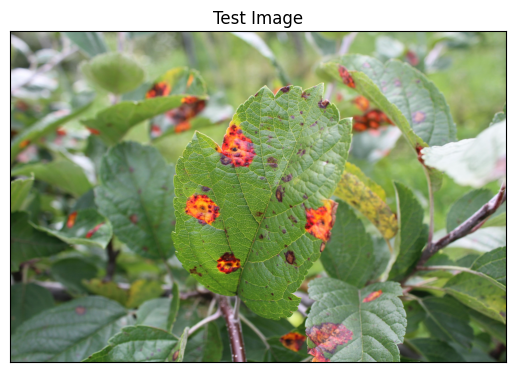

In [ ]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


**Testing the Model**

In [ ]:
image = tf.keras.preprocessing.image.load_img(img_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = model.predict(input_arr)

1/1 [==============================] - 1s 929ms/step


In [ ]:
print(predictions)

[[2.3243809e-35 2.8767128e-30 1.0000000e+00]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


In [ ]:
class_name = ['Healthy', 'Powdery', 'Rust']

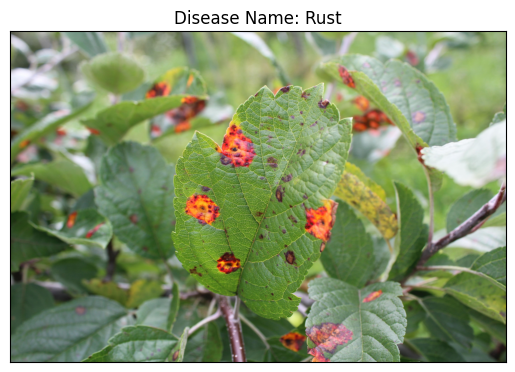

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
import streamlit as st
import tensorflow as tf
import numpy as np




#Tensorflow Model Prediction
def model_prediction(test_image):
    model = tf.keras.models.load_model("")
    image = tf.keras.preprocessing.image.load_img(test_image,target_size=(128,128))
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr]) #convert single image to batch
    predictions = model.predict(input_arr)
    return np.argmax(predictions) #return index of max element

#Sidebar
st.sidebar.title("Dashboard")
app_mode = st.sidebar.selectbox("Select Page",["Home","About","Disease Recognition"])

#Main Page
if(app_mode=="Home"):
    st.header("PLANT DISEASE RECOGNITION SYSTEM")

    st.markdown("""
    Welcome to the Plant Disease Recognition System! 🌿🔍

    Our mission is to help in identifying plant diseases efficiently. Upload an image of a plant, and our system will analyze it to detect any signs of diseases. Together, let's protect our crops and ensure a healthier harvest!

    ### How It Works
    1. **Upload Image:** Go to the **Disease Recognition** page and upload an image of a plant with suspected diseases.
    2. **Analysis:** Our system will process the image using advanced algorithms to identify potential diseases.
    3. **Results:** View the results and recommendations for further action.

    ### Why Choose Us?
    - **Accuracy:** Our system utilizes state-of-the-art machine learning techniques for accurate disease detection.
    - **User-Friendly:** Simple and intuitive interface for seamless user experience.
    - **Fast and Efficient:** Receive results in seconds, allowing for quick decision-making.

    ### Get Started
    Click on the **Disease Recognition** page in the sidebar to upload an image and experience the power of our Plant Disease Recognition System!

    ### About Us
    Learn more about the project, our team, and our goals on the **About** page.
    """)

#About Project
elif(app_mode=="About"):
    st.header("About")
    st.markdown("""
                #### About Dataset
                This dataset is recreated using offline augmentation from the original dataset.The original dataset can be found on this github repo.
                This dataset consists of about 87K rgb images of healthy and diseased crop leaves which is categorized into 38 different classes.The total dataset is divided into 80/20 ratio of training and validation set preserving the directory structure.
                A new directory containing 33 test images is created later for prediction purpose.
                #### Content
                1. train (70295 images)
                2. test (33 images)
                3. validation (17572 images)

                """)

#Prediction Page
elif(app_mode=="Disease Recognition"):
    st.header("Disease Recognition")
    test_image = st.file_uploader("Choose an Image:")
    if(st.button("Show Image")):
        st.image(test_image,width=4,use_column_width=True)
    #Predict button
    if(st.button("Predict")):
        st.snow()
        st.write("Our Prediction")
        result_index = model_prediction(test_image)
        #Reading Labels
        class_name = ['Healthy','Powdery','Rust']
        st.success("Model is Predicting it's a {}".format(class_name[result_index]))
